# Explore here

PASO 1 CARGAR LA BASE DE DATOS.

In [2]:

import pandas as pd
url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
df = pd.read_csv(url)
df.head() 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


PASO 2: REALIZACION DEL EDA COMPLETO

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [4]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
df = pd.read_csv(url)


In [5]:
print("Dimensiones:", df.shape)
print("\nTipos de datos:")
print(df.dtypes)
print("\nValores nulos por columna:")
print(df.isnull().sum())


Dimensiones: (768, 9)

Tipos de datos:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Valores nulos por columna:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


/tmp/ipykernel_865/1292307089.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='Set2')


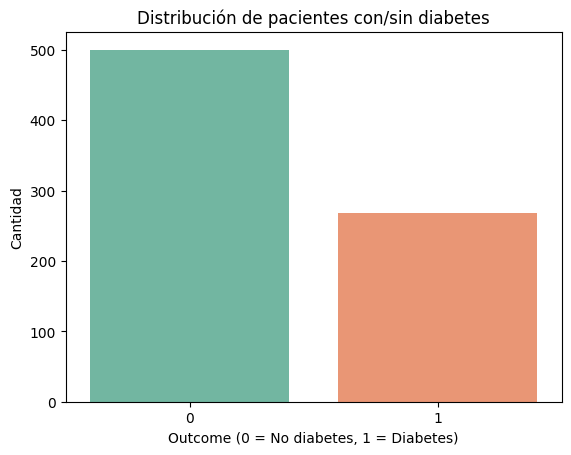

In [6]:
sns.countplot(x='Outcome', data=df, palette='Set2')
plt.title("Distribución de pacientes con/sin diabetes")
plt.xlabel("Outcome (0 = No diabetes, 1 = Diabetes)")
plt.ylabel("Cantidad")
plt.show()



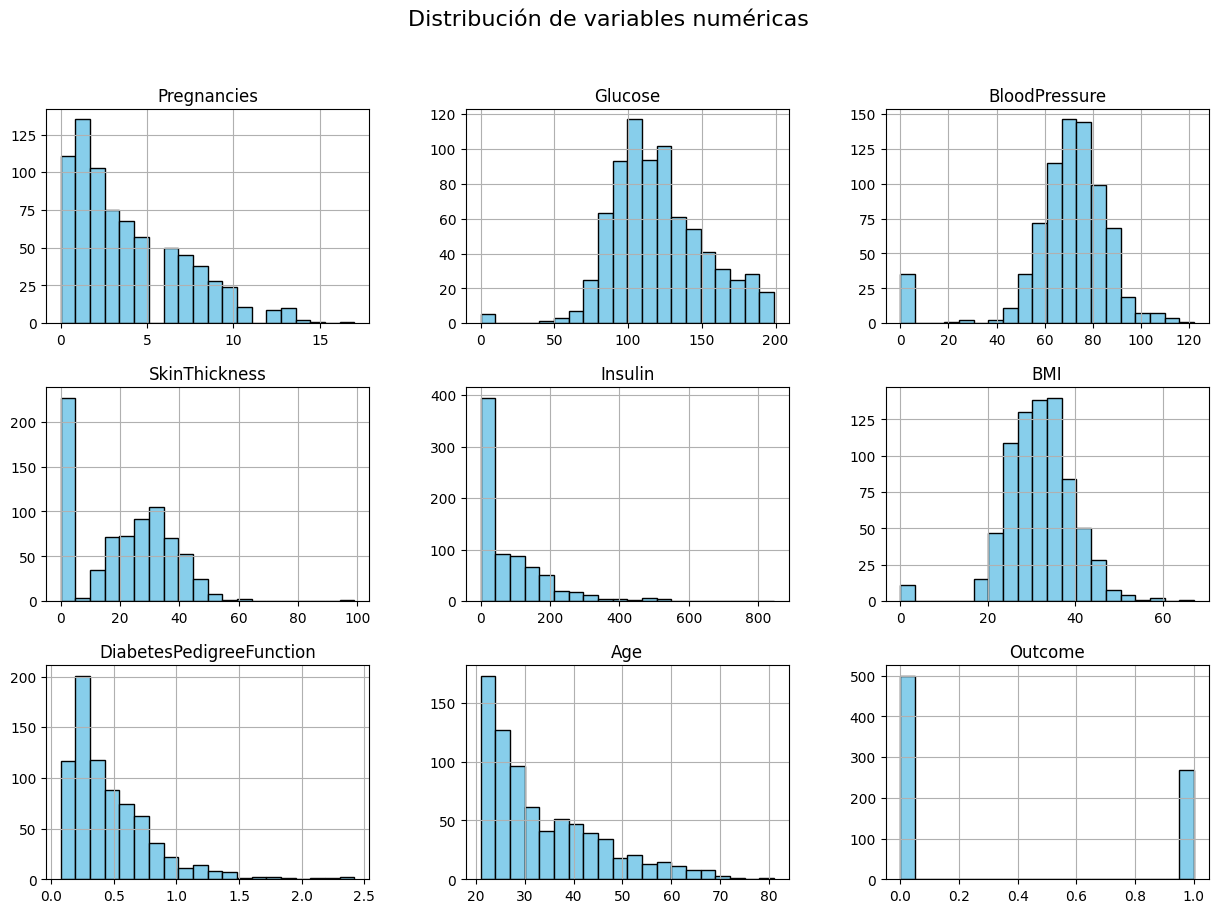

In [7]:
df.hist(bins=20, figsize=(15,10), color='skyblue', edgecolor='black')
plt.suptitle("Distribución de variables numéricas", fontsize=16)
plt.show()


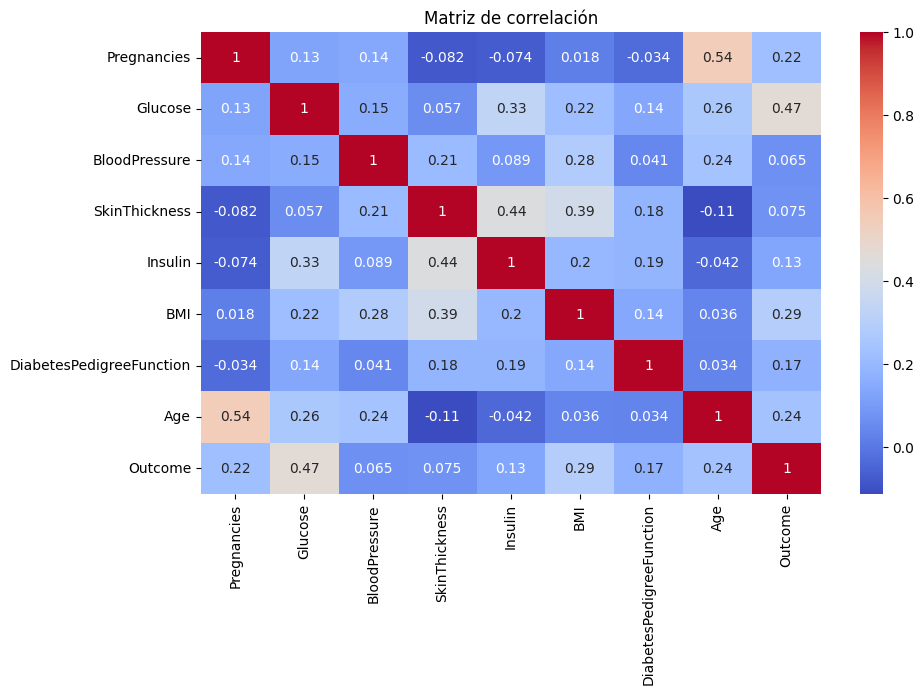

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()




DIVISION  Train/Test.

In [9]:
X = df.drop("Outcome", axis=1)  # Variables predictoras
y = df["Outcome"]               # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Tamaño Train:", X_train.shape)
print("Tamaño Test:", X_test.shape)

Tamaño Train: (614, 8)
Tamaño Test: (154, 8)


PUNTO 3: MODELO DE ARBOL DE DECISION.

In [16]:
# Comparación de criterios Gini vs Entropy
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
criterios = ['gini', 'entropy']
resultados = {}

for criterio in criterios:
    model = DecisionTreeClassifier(criterion=criterio, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    resultados[criterio] = acc
    print(f"Criterio: {criterio}")
    print(f"Exactitud: {acc:.4f}")
    print()



Criterio: gini
Exactitud: 0.7273

Criterio: entropy
Exactitud: 0.7013



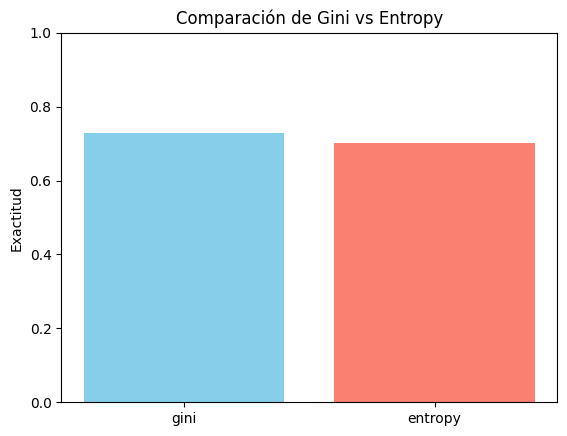

In [18]:
# Gráfico de comparación
plt.bar(resultados.keys(), resultados.values(), color=['skyblue', 'salmon'])
plt.ylabel('Exactitud')
plt.title('Comparación de Gini vs Entropy')
plt.ylim(0,1)
plt.show()

PASO 4: OPTIMIZACION DEL MODELO ANTERIOR

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [ ]:

# El mejor criterio encontrado
best_criterion = "entropy"  
model = DecisionTreeClassifier(criterion=best_criterion, random_state=42)


In [22]:
param_grid = {
    'max_depth': [2, 4, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6] 
    }

In [23]:
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)



In [24]:
grid_search.fit(X_train, y_train)


,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'max_depth': [2, 4, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [25]:
print("Mejores parámetros encontrados:", grid_search.best_params_)
print("Mejor score de validación:", grid_search.best_score_)


Mejores parámetros encontrados: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mejor score de validación: 0.7557643609222977


In [28]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.70      0.92      0.80       100
           1       0.65      0.28      0.39        54

    accuracy                           0.69       154
   macro avg       0.68      0.60      0.59       154
weighted avg       0.68      0.69      0.65       154



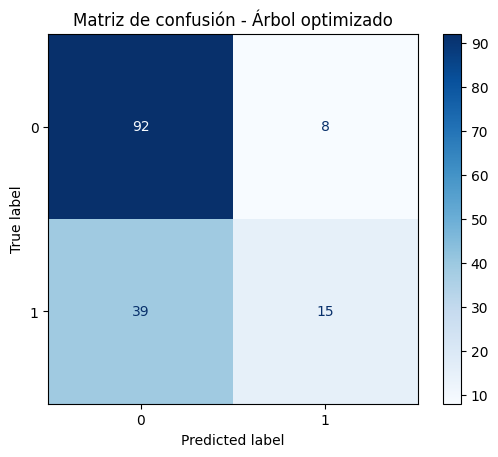

In [29]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap="Blues")
plt.title("Matriz de confusión - Árbol optimizado")
plt.show()

PASO 5 